## Generative Adversarial Network  (When Fake Gets Real)

![](https://camo.githubusercontent.com/4c4f5a700b817b646bbed49dffdaa4a0925df8aa/68747470733a2f2f6d6f7276616e7a686f752e6769746875622e696f2f7374617469632f726573756c74732f746f7263682f342d342d312e676966)

In this two models will fight against each other and will be able to co-train through plain old `backpropagation`

The models play two distinct roles. Given some real data set R, G is the `generator`, trying to create fake data that looks just like the genuine data, while D is the `discriminator`, getting data from either the real set or G and labeling the difference. Goodfellow’s metaphor (and a fine one it is) was that G was like a team of forgers trying to match real paintings with their output, while D was the team of detectives trying to tell the difference. (Except that in this case, the forgers G never get to see the original data — only the judgments of D. They’re like blind forgers.) [to get more detail](https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f)

![](https://cdn-images-1.medium.com/max/800/1*-gFsbymY9oJUQJ-A3GTfeg.png)

In the ideal case, both D and G would get better over time until G had essentially become a “master forger” of the genuine article and D was at a loss, “unable to differentiate between the two distributions.”

explaination credits - [Dev Nag](https://medium.com/@devnag/generative-adversarial-networks-gans-in-50-lines-of-code-pytorch-e81b79659e3f)


### Dependencies 

In [1]:
%pylab inline

import os
import numpy as np
import pandas as pd
from scipy.misc import imread

from keras.datasets import mnist
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, InputLayer
from keras.regularizers import L1L2
from keras.layers import Input
from keras_adversarial import AdversarialModel, simple_gan, gan_targets
from keras_adversarial import AdversarialOptimizerSimultaneous, normal_latent_sampling

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


### Loading traditional MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

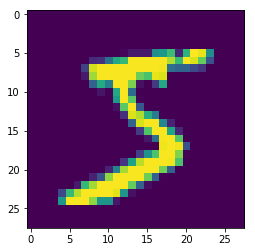

In [3]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])


Some processing to make sure everything gonna go well..

In [4]:
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
train_x =X_train/ 255
X_test /= 255

In [5]:
train_x.shape[1:]

(1, 28, 28)

## GAN architecture
![](https://d3ansictanv2wj.cloudfront.net/GAN_Overall-7319eab235d83fe971fb769f62cbb15d.png)

### Generative models are Deep convolutional in Nature; while Discriminative ones are deconvolutional

![](https://camo.githubusercontent.com/3f0526681587126784943a49fd7da4c1bd216ae4/68747470733a2f2f6169322d73322d7075626c69632e73332e616d617a6f6e6177732e636f6d2f666967757265732f323031362d31312d30382f343266366635343534646461393964383938396639383134393839656664353066653830376565382f332d466967757265312d312e706e67)

In [33]:
# generator
generative_model = Sequential([
    Dense(units=500, input_dim=100, activation='relu'),

    Dense(units=600, activation='relu'),
        
    Dense(units=784, activation='sigmoid'),
    
    Reshape(d_input_shape),
])


# discriminator
discriminative_model = Sequential([
    InputLayer(input_shape=(28,28)),
    
    Flatten(),
        
    Dense(units=600, activation='relu'),

    Dense(units=500, activation='relu'),
        
    Dense(units=1, activation='sigmoid'),
])

In [34]:
generative_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 500)               50500     
_________________________________________________________________
dense_26 (Dense)             (None, 600)               300600    
_________________________________________________________________
dense_27 (Dense)             (None, 784)               471184    
_________________________________________________________________
reshape_4 (Reshape)          (None, 28, 28)            0         
Total params: 822,284
Trainable params: 822,284
Non-trainable params: 0
_________________________________________________________________


In [35]:
discriminative_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 28, 28)            0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 600)               471000    
_________________________________________________________________
dense_29 (Dense)             (None, 500)               300500    
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 501       
Total params: 772,001
Trainable params: 772,001
Non-trainable params: 0
_________________________________________________________________


## GAN Model

In [36]:
from keras.models import Model
from keras.optimizers import Adam, SGD
opt = SGD(lr=1e-3)



def training(model, to_train = False):
    model.trainable = to_train
    for l in model.layers:
       l.trainable = to_train
training(discriminator, False)



# # Build  GAN model

fake_data_input = Input(shape=[100])

genrated_data = generative_model(fake_data_input)

discriminative_output= discriminator(genrated_data)

GAN = Model(fake_data_input, discriminative_output)
GAN.compile(loss='categorical_crossentropy',optimizer=opt)
GAN.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_13 (Sequential)   (None, 28, 28)            822284    
_________________________________________________________________
sequential_8 (Sequential)    (None, 1)                 643501    
Total params: 1,465,785
Trainable params: 822,284
Non-trainable params: 643,501
_________________________________________________________________


In [ ]:
epochs = 25 
batch_size = 128

### yet to be continue..... (some other thing has to catch first)